In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'; 
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn import metrics as skmetrics
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.utils.vis_utils import plot_model

# Load Dataset

In [2]:
train_filename='dataset_training.csv'
df=pd.read_csv(train_filename, nrows=12001, header=0,comment='#', na_values=[""])


In [3]:
# Data preparation
X = df.drop(['target'], axis = 1).values
y = df['target'].values

print("Input shape (X): {} --- Output shape (y): {}".format(X.shape, y.shape))

Input shape (X): (12000, 4) --- Output shape (y): (12000,)


In [4]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, stratify=y)

print("Train sets shape: {} {}".format(X_train.shape, y_train.shape))
print("Train sets shape: {} {}".format(X_validation.shape, y_validation.shape))

Train sets shape: (9600, 4) (9600,)
Train sets shape: (2400, 4) (2400,)


In [5]:
# Data preparation
#X_validation = df_test.drop(['target'], axis = 1).values
#y_validation = df_test['target'].values

#print("Input shape (X): {} --- Output shape (y): {}".format(X_validation.shape, y_validation.shape))

In [6]:
# Combine Data
X = np.concatenate((X_train, X_validation), axis=0)
Y = np.concatenate((y_train, y_validation), axis=0)
print(X.shape)
print(Y.shape)

(12000, 4)
(12000,)


*Model definition and compile*

In [7]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(120, activation = 'relu'),
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dense(80, activation = 'relu'),
        tf.keras.layers.Dense(40, activation = 'relu'),
        tf.keras.layers.Dense(20, activation = 'relu'),
        tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(loss= tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ['accuracy'])

c:\Users\madda\Desktop\GUI\venv_new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Build Starting Network

In [8]:
history=model.fit(X_train, y_train, epochs = 30, batch_size=150, validation_data=(X_validation, y_validation))

Epoch 1/30
64/64 [==============================] - 1s 8ms/step - loss: 83.3969 - accuracy: 0.3423 - val_loss: 1.1545 - val_accuracy: 0.3646
Epoch 2/30
64/64 [==============================] - 0s 4ms/step - loss: 1.3637 - accuracy: 0.4062 - val_loss: 0.9968 - val_accuracy: 0.5688
Epoch 3/30
64/64 [==============================] - 0s 4ms/step - loss: 0.9388 - accuracy: 0.5575 - val_loss: 0.9046 - val_accuracy: 0.5550
Epoch 4/30
64/64 [==============================] - 0s 4ms/step - loss: 0.9017 - accuracy: 0.5791 - val_loss: 0.8454 - val_accuracy: 0.6592
Epoch 5/30
64/64 [==============================] - 0s 4ms/step - loss: 0.8112 - accuracy: 0.6933 - val_loss: 0.7887 - val_accuracy: 0.6729
Epoch 6/30
64/64 [==============================] - 0s 4ms/step - loss: 0.7628 - accuracy: 0.7127 - val_loss: 0.7176 - val_accuracy: 0.7629
Epoch 7/30
64/64 [==============================] - 0s 4ms/step - loss: 0.7193 - accuracy: 0.7520 - val_loss: 0.7074 - val_accuracy: 0.6621
Epoch 8/30
64/64 [=

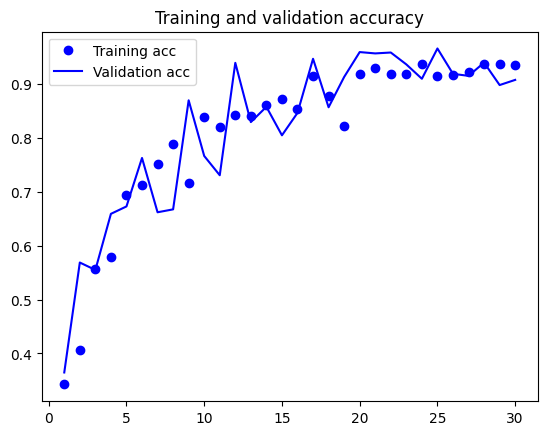

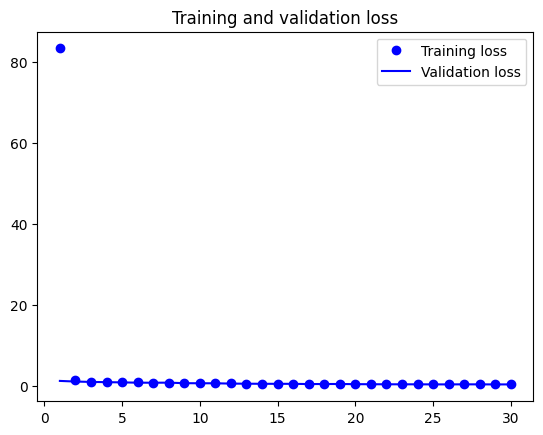

In [9]:
epochs = range(1, 31)

plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()